In [1]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
titanic = pd.read_csv('/home/xyk/data/Downloads/PTA/titanic.csv')

In [3]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
titanic.shape[0]

891

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.shape

(891, 12)

In [7]:
titanic.index

RangeIndex(start=0, stop=891, step=1)

In [8]:
t = titanic.groupby('Name')
t = t.sum()
t = t.sort_values(['Pclass'], ascending=False)
t

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Name,,,,,,,
"Abbing, Mr. Anthony",846,0,3,42.0,0,0,7.550
"Moor, Master. Meier",752,1,3,6.0,0,1,12.475
"McCormack, Mr. Thomas Joseph",829,1,3,0.0,0,0,7.750
"McCoy, Miss. Agnes",331,1,3,0.0,2,0,23.250
"McCoy, Mr. Bernard",302,1,3,0.0,2,0,23.250
...,...,...,...,...,...,...,...
"Silvey, Mr. William Baird",435,0,1,50.0,1,0,55.900
"Silvey, Mrs. William Baird (Alice Munger)",578,1,1,39.0,1,0,55.900
"Behr, Mr. Karl Howell",890,1,1,26.0,0,0,30.000


In [9]:
total_items_orders = titanic.Fare.sum()
total_items_orders


28693.9493

In [10]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
titanic.drop(columns='PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


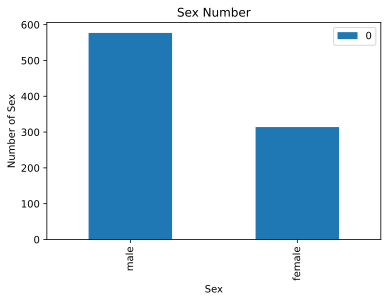

In [12]:
x = titanic.Sex
letter_counts = Counter(x)
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Number of Sex')
plt.title('Sex Number')
plt.show()

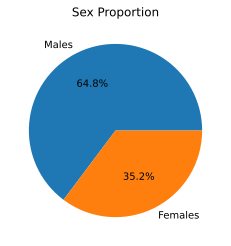

In [13]:
males = (titanic['Sex'] == 'male').sum()
females = (titanic['Sex'] == 'female').sum()
proportions = [males, females]
plt.pie(proportions,labels = ['Males', 'Females'],autopct = '%1.1f%%')
plt.title("Sex Proportion")
plt.show()

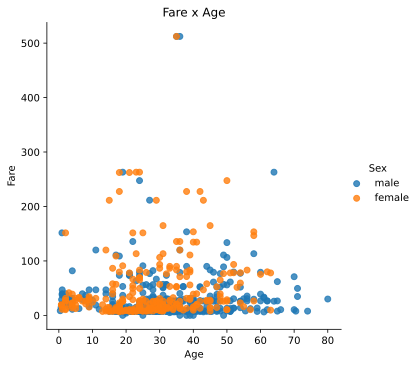

In [14]:
lm = sns.lmplot(x = 'Age', y = 'Fare', data = titanic, hue = 'Sex', fit_reg=False)
lm.set(title = 'Fare x Age')
axes = lm.axes

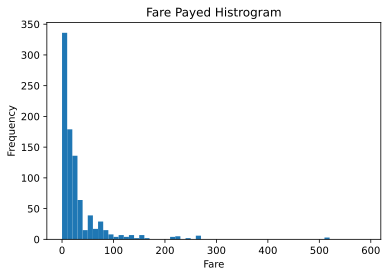

In [15]:
df = titanic.Fare.sort_values(ascending = False)
binsVal = np.arange(0,600,10)
plt.hist(df, bins = binsVal)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Payed Histrogram')
plt.show()

,Survived,Pclass,Age,Sex,Fare,SibSp,Parch
Survived,1.000000,-0.338481,-0.077221,-0.543351,0.257307,-0.035322,0.081629
Pclass,-0.338481,1.000000,-0.369226,0.131900,-0.549500,0.083081,0.018443
Age,-0.077221,-0.369226,1.000000,0.093254,0.096067,-0.308247,-0.189119
Sex,-0.543351,0.131900,0.093254,1.000000,-0.182333,-0.114631,-0.245489
Fare,0.257307,-0.549500,0.096067,-0.182333,1.000000,0.159651,0.216225
SibSp,-0.035322,0.083081,-0.308247,-0.114631,0.159651,1.000000,0.414838
Parch,0.081629,0.018443,-0.189119,-0.245489,0.216225,0.414838,1.000000


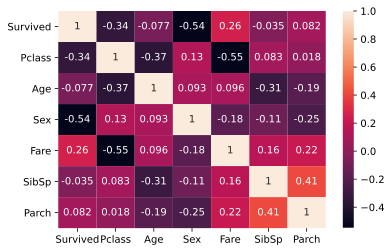

In [16]:
df = pd.DataFrame(data=titanic)
df['Sex'] = df['Sex'].map({'male':1, 'female':0})
df = df[['Survived','Pclass','Age','Sex','Fare','SibSp', 'Parch']].corr()
sns.heatmap(df,annot=True)
df

In [17]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
titanic.groupby(titanic['Age'].isnull()).mean()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Age,,,,,,,,
False,448.582633,0.406162,2.236695,0.634454,29.699118,0.512605,0.431373,34.694514
True,435.581921,0.293785,2.598870,0.700565,NaN,0.564972,0.180791,22.158567


In [19]:
titanic['Age_clean'] = titanic['Age'].fillna(titanic['Age'].mean())
titanic['Age_clean'].isnull().sum()

0

In [20]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_clean        0
dtype: int64

In [21]:
titanic['Embarked_clean'] = titanic['Embarked'].fillna('0')
titanic['Embarked_clean'].isnull().sum()

0

In [22]:
titanic.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age               177
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
Age_clean           0
Embarked_clean      0
dtype: int64

In [23]:
def detect_outlier(input):
    outliers = []
    data = titanic[input]
    mean = np.mean(data)
    std = np.std(data)

    for y in data:
        z = (y - mean)/std
        if np.abs(z) > 3:
            outliers.append(y)

    print('\nOutliers from {}:'.format(input))
    print('\n\t95%: {} values exceed {:.4f} '.format(
        len([i for i in data if i > data.quantile(0.95)]),
        data.quantile(0.95)))
    print('\n\t3std: {} values exceed {:.4f} '.format(
        len(outliers),
        mean + 3*(std)))
    print('\n\t99%: {} values exceed {:.4f} '.format(
        len([i for i in data if i > data.quantile(0.99)]),
        data.quantile(0.99)))

In [24]:
for column in ['Age_clean', 'SibSp', 'Parch', 'Fare']:
    detect_outlier(column)


Outliers from Age_clean:

	95%: 42 values exceed 54.0000 

	3std: 7 values exceed 68.6833 

	99%: 8 values exceed 65.0000 

Outliers from SibSp:

	95%: 30 values exceed 3.0000 

	3std: 30 values exceed 3.8294 

	99%: 7 values exceed 5.0000 

Outliers from Parch:

	95%: 15 values exceed 2.0000 

	3std: 15 values exceed 2.7984 

	99%: 6 values exceed 4.0000 

Outliers from Fare:

	95%: 45 values exceed 112.0791 

	3std: 20 values exceed 181.2008 

	99%: 9 values exceed 249.0062 


In [25]:
titanic['Age_clean'].clip(upper=titanic['Age_clean'].quantile(.99), inplace=True)
titanic['Fare_clean'] = titanic['Fare'].clip(upper=titanic['Fare'].quantile(.99))
titanic.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Age_clean,Fare_clean
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,29.640195,31.224767
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,12.820616,42.524125
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,22.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,29.699118,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,35.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,65.000000,249.006220


In [26]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,35.0,S,53.1000
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,35.0,S,8.0500


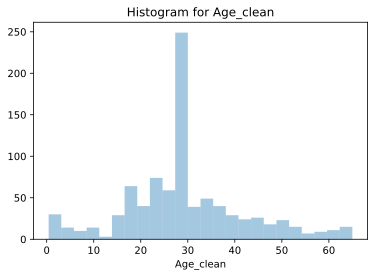

In [27]:
sns.distplot(titanic['Age_clean'], kde=False)
plt.title('Histogram for {}'.format('Age_clean'))
plt.show()

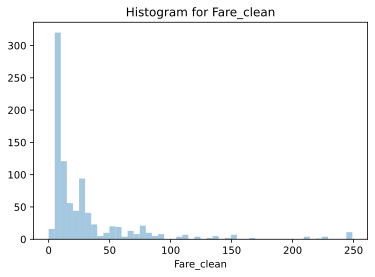

In [28]:
sns.distplot(titanic['Fare_clean'], kde=False)
plt.title('Histogram for {}'.format('Fare_clean'))
plt.show()

In [29]:
df = pd.DataFrame(data=titanic)
df.Age_clean.describe()

count    891.000000
mean      29.640195
std       12.820616
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       65.000000
Name: Age_clean, dtype: float64

In [30]:
df.Fare_clean.describe()

count    891.000000
mean      31.224767
std       42.524125
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      249.006220
Name: Fare_clean, dtype: float64

In [31]:
Age_clean_log = np.log(df.Age_clean + 1)
Age_clean_log.describe()

count    891.000000
mean       3.290884
std        0.614494
min        0.350657
25%        3.135494
50%        3.424234
75%        3.583519
max        4.189655
Name: Age_clean, dtype: float64

In [32]:
Fare_clean_log = np.log(df.Fare_clean + 1)
Fare_clean_log.describe()

count    891.000000
mean       2.959462
std        0.960738
min        0.000000
25%        2.187218
50%        2.737881
75%        3.465736
max        5.521486
Name: Fare_clean, dtype: float64

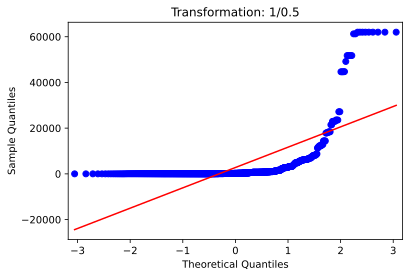

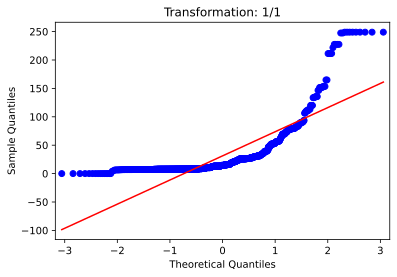

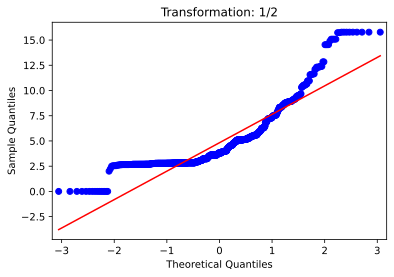

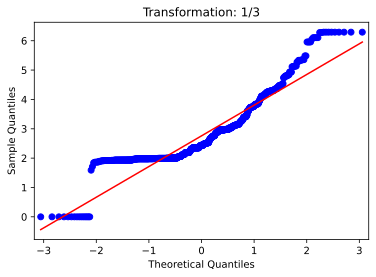

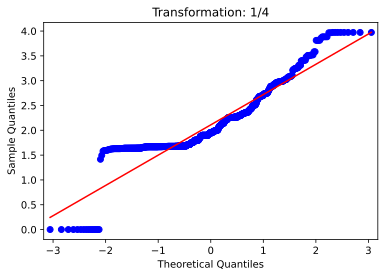

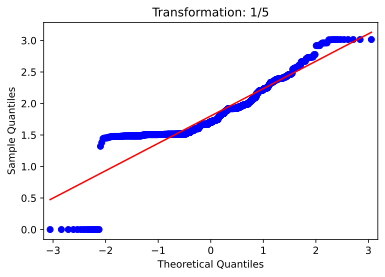

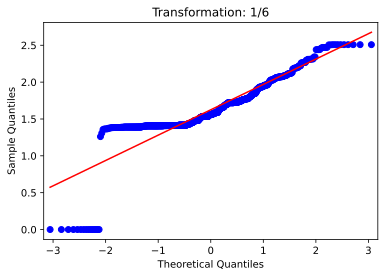

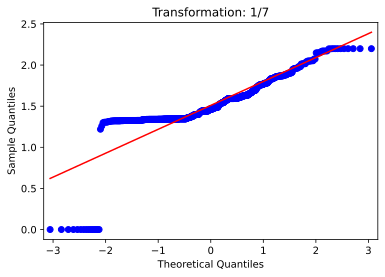

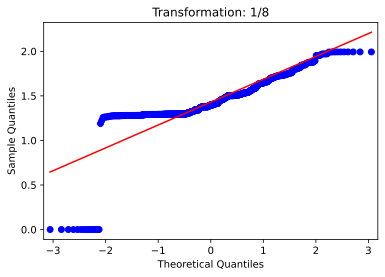

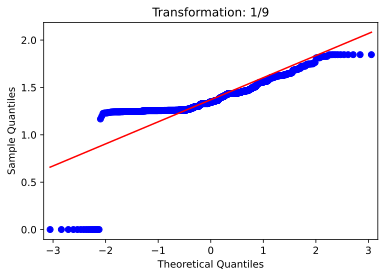

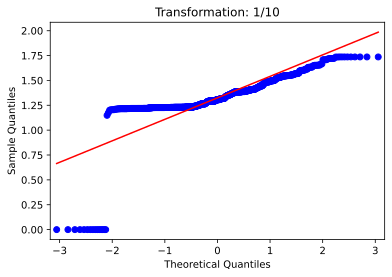

In [33]:
for i in [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    data_t = titanic['Fare_clean']**(1/i)
    qqplot(data_t, line='s')
    plt.title("Transformation: 1/{}".format(str(i)))

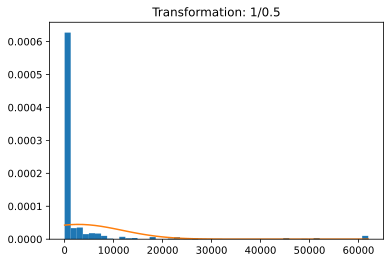

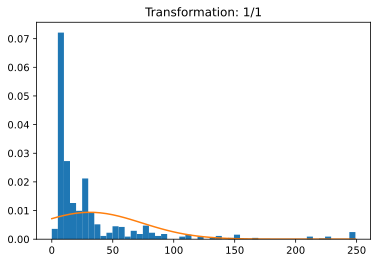

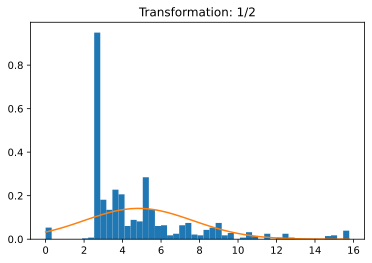

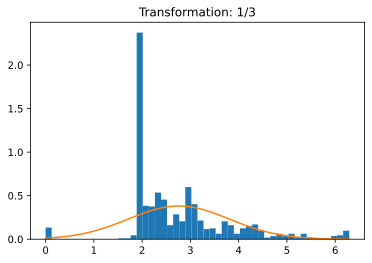

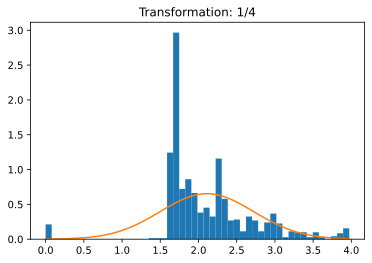

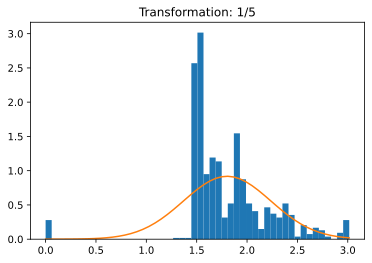

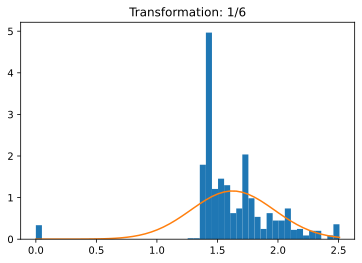

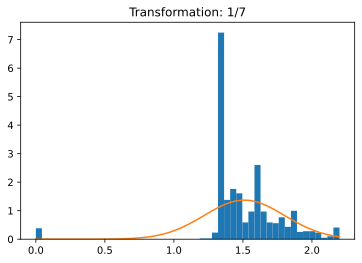

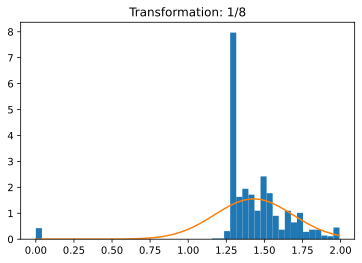

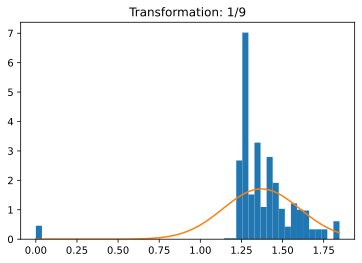

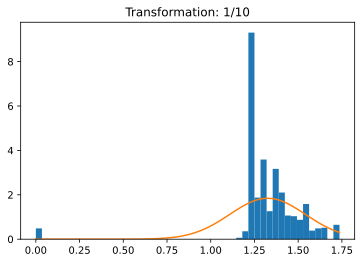

In [34]:
for i in [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    data_t = titanic['Fare_clean']**(1/i)
    n, bins, patches = plt.hist(data_t, 50, density=True)
    mu = np.mean(data_t)
    sigma = np.std(data_t)
    plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))
    plt.title("Transformation: 1/{}".format(str(i)))
    plt.show()

In [35]:
titanic['Fare_clean_transform'] = titanic['Fare_clean']**(1/5)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_transform
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S,7.9250,1.512864
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,35.0,S,53.1000,2.213191
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,35.0,S,8.0500,1.517606


In [36]:
titanic['Title'] = titanic['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_transform,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S,7.9250,1.512864,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,35.0,S,53.1000,2.213191,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,35.0,S,8.0500,1.517606,Mr


In [37]:
titanic.pivot_table('Survived', index=['Title', 'Sex'], aggfunc=['count', 'mean'])

count      mean
                 Survived  Survived
Title        Sex                   
Capt         1          1  0.000000
Col          1          2  0.500000
Don          1          1  0.000000
Dr           0          1  1.000000
             1          6  0.333333
Jonkheer     1          1  0.000000
Lady         0          1  1.000000
Major        1          2  0.500000
Master       1         40  0.575000
Miss         0        182  0.697802
Mlle         0          2  1.000000
Mme          0          1  1.000000
Mr           1        517  0.156673
Mrs          0        125  0.792000
Ms           0          1  1.000000
Rev          1          6  0.000000
Sir          1          1  1.000000
the Countess 0          1  1.000000

In [38]:
titanic.groupby(titanic['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [39]:
titanic['Cabin_indicator'] = np.where(titanic['Cabin'].isnull(), 0, 1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_transform,Title,Cabin_indicator
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S,7.9250,1.512864,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,35.0,S,53.1000,2.213191,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,35.0,S,8.0500,1.517606,Mr,0


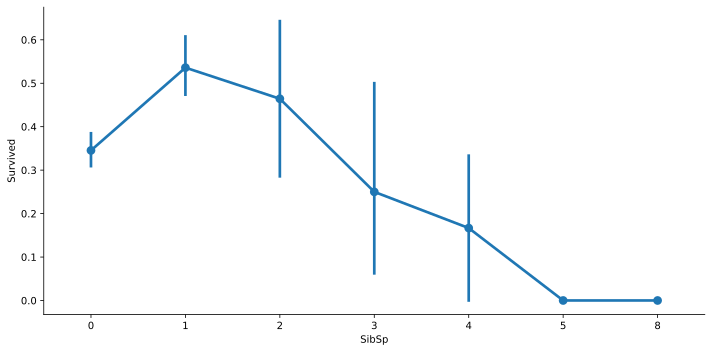

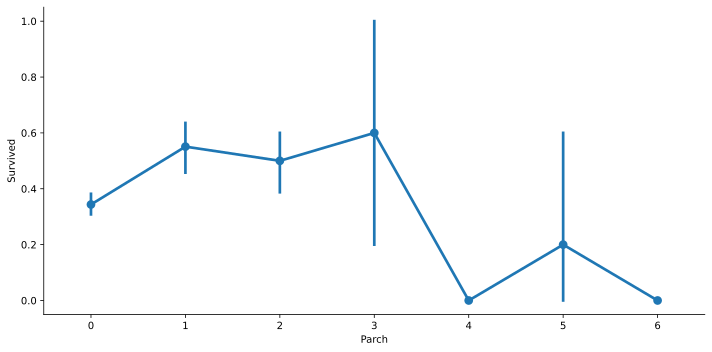

In [40]:
for col in ['SibSp', 'Parch']:
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2)

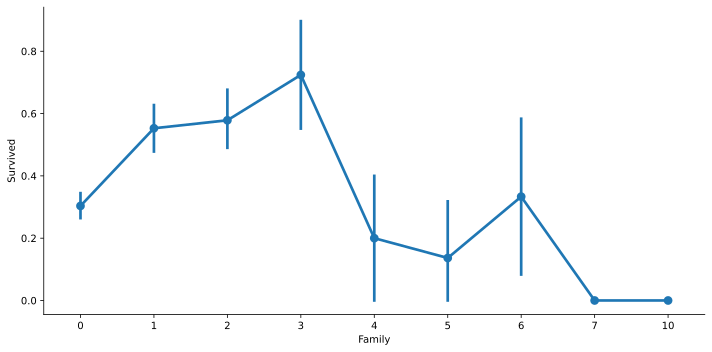

In [41]:
titanic['Family'] = titanic['SibSp'] + titanic['Parch']
sns.catplot(x='Family', y='Survived', data=titanic, kind='point', aspect=2)

In [42]:
for feature in ['Sex', 'Cabin', 'Embarked', 'Embarked_clean', 'Title']:
    le = LabelEncoder()
    titanic[feature] = le.fit_transform(titanic[feature].astype(str))
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_transform,Title,Cabin_indicator,Family
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,2,22.0,3,7.2500,1.486167,11,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0,38.0,1,71.2833,2.347457,12,1,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,2,26.0,3,7.9250,1.512864,8,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2,35.0,3,53.1000,2.213191,12,1,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,2,35.0,3,8.0500,1.517606,11,0,0


In [43]:
features = titanic.drop(['PassengerId', 'Ticket', 'Name', 'Survived'], axis=1)
labels = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.5, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_transform,Title,Cabin_indicator,Family
213,2,1,30.0,0,0,13.0000,147,2,30.0,3,13.0000,1.670278,11,0,0
586,2,1,47.0,0,0,15.0000,147,2,47.0,3,15.0000,1.718772,11,0,0
499,3,1,24.0,0,0,7.7958,147,2,24.0,3,7.7958,1.507899,11,0,0
821,3,1,27.0,0,0,8.6625,147,2,27.0,3,8.6625,1.540028,11,0,0
246,3,0,25.0,0,0,7.7750,147,2,25.0,3,7.7750,1.507093,8,0,0


In [44]:

X_train.to_csv('/home/xyk/data/Downloads/PTA/split_data/train_features.csv', index=False)
X_val.to_csv('/home/xyk/data/Downloads/PTA/split_data/val_features.csv', index=False)
X_test.to_csv('/home/xyk/data/Downloads/PTA/split_data/test_features.csv', index=False)

y_train.to_csv('/home/xyk/data/Downloads/PTA/split_data/train_labels.csv', index=False)
y_val.to_csv('/home/xyk/data/Downloads/PTA/split_data/val_labels.csv', index=False)
y_test.to_csv('/home/xyk/data/Downloads/PTA/split_data/test_labels.csv', index=False)

In [45]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.5
0.25
0.25


In [46]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [47]:
features = X_train.columns

X_train[features] = scaler.transform(X_train[features])
X_val[features] = scaler.transform(X_val[features])
X_test[features] = scaler.transform(X_test[features])

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_transform,Title,Cabin_indicator,Family
213,-0.356060,0.734706,0.055779,-0.45738,-0.50788,-0.402914,0.469254,0.560957,0.059120,0.574686,-0.458592,-0.388302,0.426319,-0.552255,-0.56379
586,-0.356060,0.734706,1.258499,-0.45738,-0.50788,-0.364468,0.469254,0.560957,1.412735,0.574686,-0.411992,-0.270473,0.426319,-0.552255,-0.56379
499,0.844295,0.734706,-0.368710,-0.45738,-0.50788,-0.502955,0.469254,0.560957,-0.418627,0.574686,-0.579849,-0.782841,0.426319,-0.552255,-0.56379
821,0.844295,0.734706,-0.156466,-0.45738,-0.50788,-0.486294,0.469254,0.560957,-0.179753,0.574686,-0.559655,-0.704774,0.426319,-0.552255,-0.56379
246,0.844295,-1.361089,-0.297962,-0.45738,-0.50788,-0.503354,0.469254,0.560957,-0.339002,0.574686,-0.580334,-0.784798,-1.277682,-0.552255,-0.56379
